# 1. Import Libraries and DataFrame

In [1]:
# import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# define the pathname

path = r'/Users/iMac/Library/CloudStorage/OneDrive-Personal/Data Analytics/Data Analytics Immersion/Exercise 4/2024-01_Instacart Basket Analysis'

In [3]:
# import df

df = pd.read_pickle(os.path.join(path, '02 Data', '00 Prepared Data', 'ords_prods_cust.pkl'))

In [4]:
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,order_freq,order_frequency_flag,Surname,Gender,STATE,Age,date_joined,number_of_dependents,marital_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,8.0,Frequent customer,Cox,Male,Minnesota,81,2019-08-01,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,8.0,Frequent customer,Cox,Male,Minnesota,81,2019-08-01,1,married,49620
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,8.0,Frequent customer,Glass,Female,Vermont,66,2018-06-16,2,married,158302
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,9.0,Frequent customer,Myers,Female,Wisconsin,40,2020-02-09,3,married,31308
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,9.0,Frequent customer,Myers,Female,Wisconsin,40,2020-02-09,3,married,31308


# 2a. Create Bar Chart

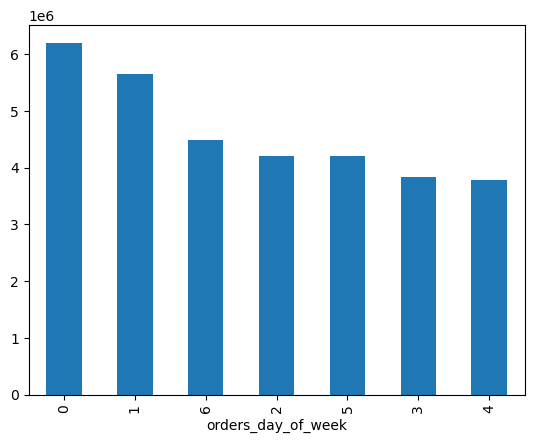

In [5]:
bar = df['orders_day_of_week'].value_counts().plot.bar()

In [6]:
df['orders_day_of_week'].describe()

count    3.240486e+07
mean     2.738867e+00
std      2.090077e+00
min      0.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      5.000000e+00
max      6.000000e+00
Name: orders_day_of_week, dtype: float64

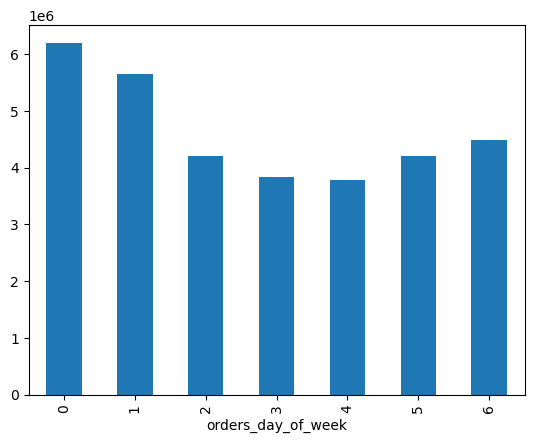

In [7]:
# sort the bars in the chart according to their index order
bar_idx = df['orders_day_of_week'].value_counts().sort_index().plot.bar()

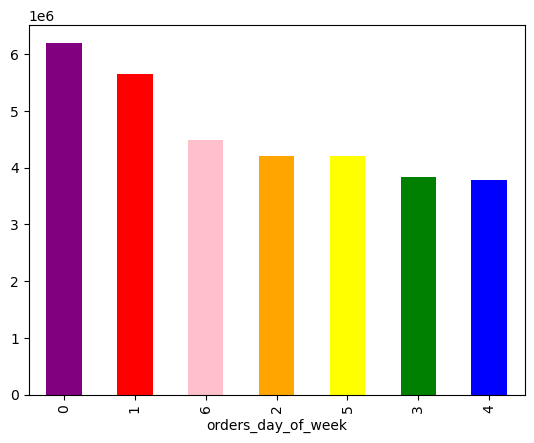

In [8]:
# sort the bars in the chart in the descending order and in color
bar_viz_clr = df['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

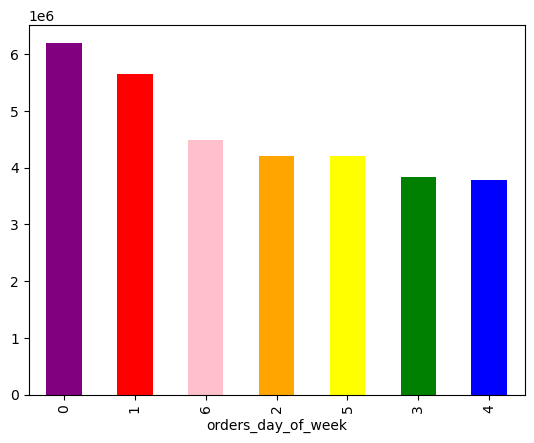

In [9]:
# export bar chart

bar_viz_clr.figure

In [10]:
# save bar chart as png

bar_viz_clr.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

# 2b. Create Histogram

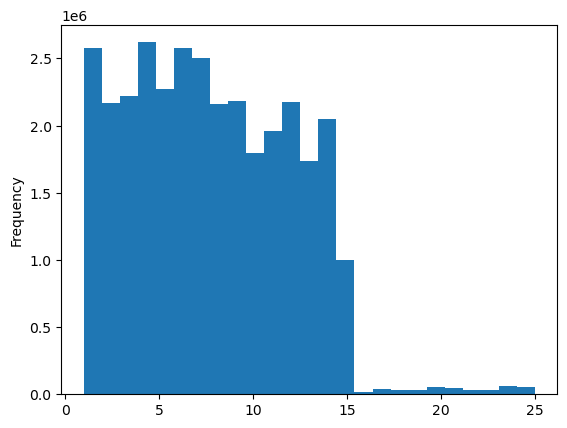

In [11]:
# create histogram of "prices" column

hist = df['prices'].plot.hist(bins = 25)

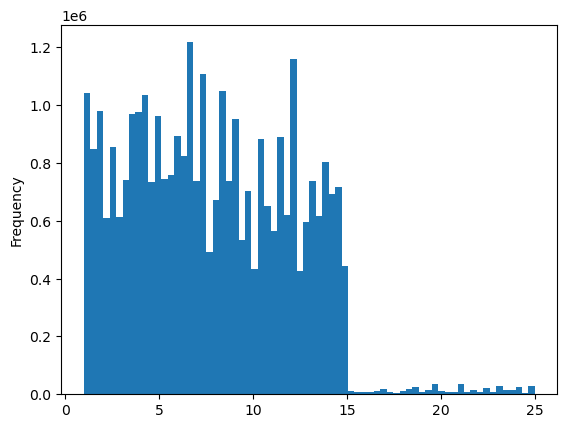

In [12]:
# create histogram of "prices" column with increased granularity

hist_2 = df['prices'].plot.hist(bins = 70)

In [13]:
# save hist_2 as png

hist_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices.png'))

# 2c. Create Scatterplot

<Axes: xlabel='prices', ylabel='prices'>

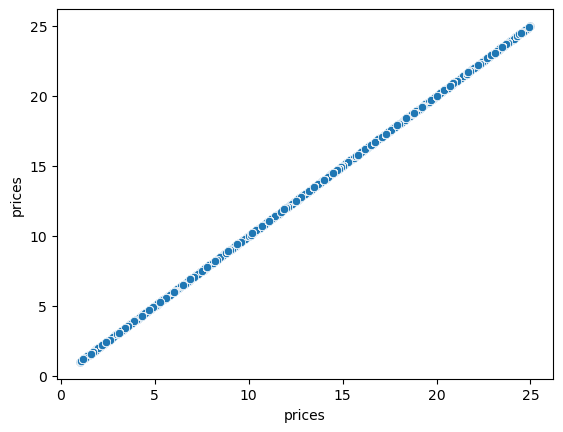

In [14]:
# create scatterplot of "prices" column to identify outliers

sns.scatterplot(x = 'prices', y = 'prices', data = df)

# 2c. Create Line Charts

In [15]:
# split dataframe 70/30

np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [16]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [17]:
# split df into two samples

big = df[dev]
small = df[~dev]

In [18]:
len(df)

32404859

In [19]:
len(big) + len(small)

32404859

In [20]:
# reduce samples to speed up the processing time

df_2 = small[['orders_day_of_week','prices']]

In [21]:
df_2.head()

,orders_day_of_week,prices
0,6,5.8
2,0,5.8
3,3,5.8
6,2,5.8
10,5,5.8


/Users/iMac/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/iMac/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


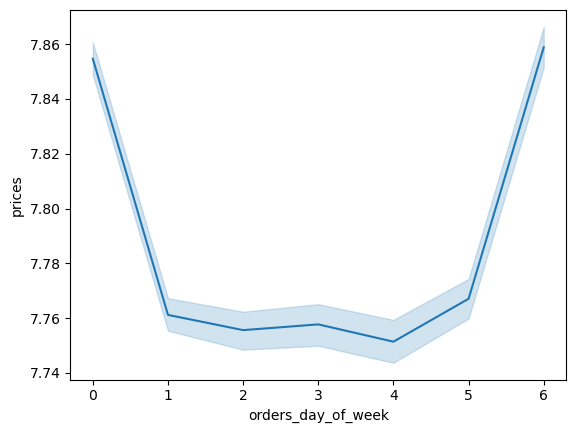

In [22]:
# create line chart of the small sample

line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

# 3. Create a histogram of the “order_hour_of_day” column.

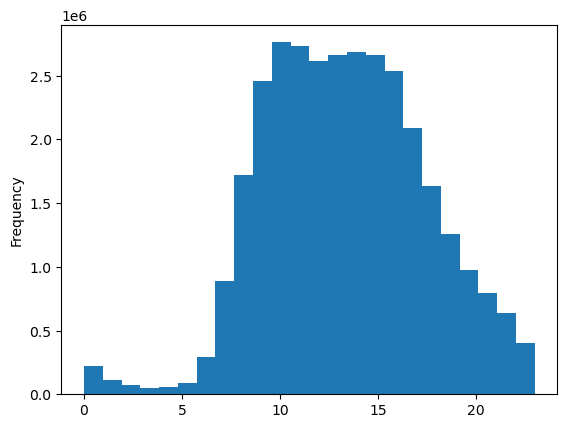

In [23]:
# create histogram of "order_hour_of_day" column with increased granularity

hist_3 = df['order_hour_of_day'].plot.hist(bins = 24)

# Observations:

- The histogram, with 24 bins representing each hour of the day, visually displays the distribution of orders.
- Peaks in the histogram indicate the hours with the highest frequency of orders, while the trough represents periods of lower order activity.
- No bins are empty, contributing to the understanding that customer orders are distributed across all hours of the day, with lowest point around 3-4 a.m. and maximum frequency between 10 and16-17.
- The average order hour being around 13–14 aligns with the peak in the histogram, suggesting a concentration of orders during the early afternoon.

# 4. Create a bar chart from the “loyalty_flag” column.

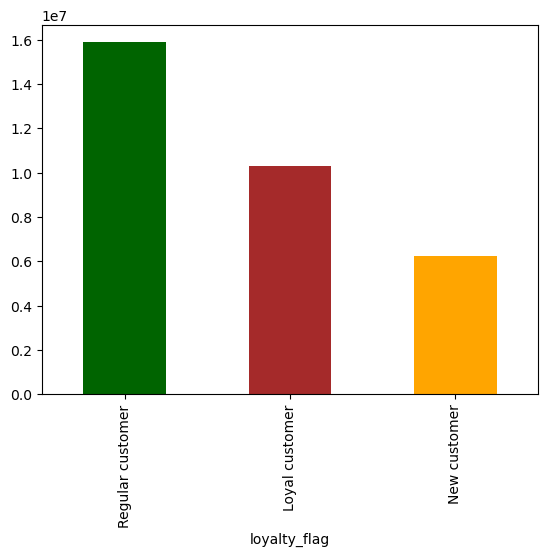

In [39]:
bar_loyalty = df['loyalty_flag'].value_counts().plot.bar(color =['darkgreen', 'brown', 'orange'])

# 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day.

In [25]:
# reduce samples to speed up the processing time

df_3 = small[['order_hour_of_day','prices']]

/Users/iMac/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/iMac/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


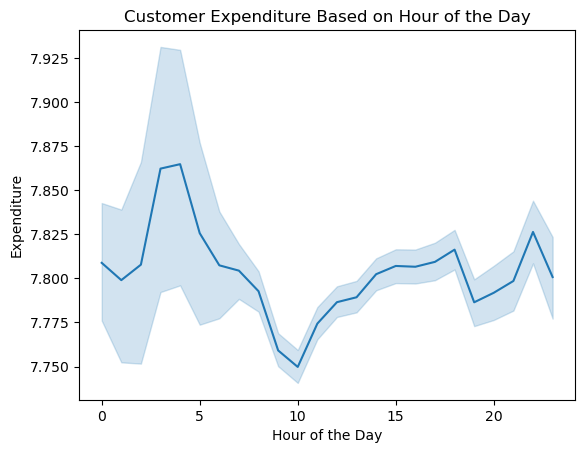

In [26]:
# create line chart of the small sample

line_2 = sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices')

plt.title('Customer Expenditure Based on Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Expenditure')
plt.show()

# Observations:

Despite the visible fluctuations, with the majority of items priced between 7 to 8 USD, there are no particular times of the day when people spend the most money.

# 6. Create a line chart exploring the connections between age and number of dependents

In [27]:
# reduce samples to speed up the processing time

df_4 = small[['Age','number_of_dependents']]

/Users/iMac/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/iMac/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


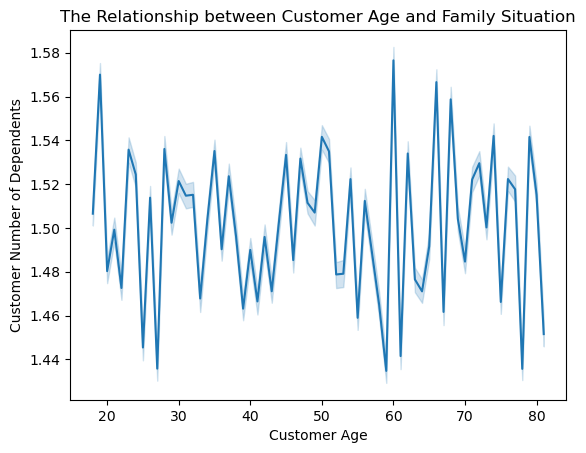

In [28]:
# create line chart of the small sample

line_3 = sns.lineplot(data = df_4, x = 'Age',y = 'number_of_dependents')

plt.title('The Relationship between Customer Age and Family Situation')
plt.xlabel('Customer Age')
plt.ylabel('Customer Number of Dependents')
plt.show()

### The line chart reveals no substantial correlation between customers' age and their family situation as the average number of dependents per customer remains relatively stable around 1.5 regardless of age, indicating a lack of pronounced variation in this relationship.

# 7. Create a scatterplot to explore whether there’s a connection between age and spending power (income).

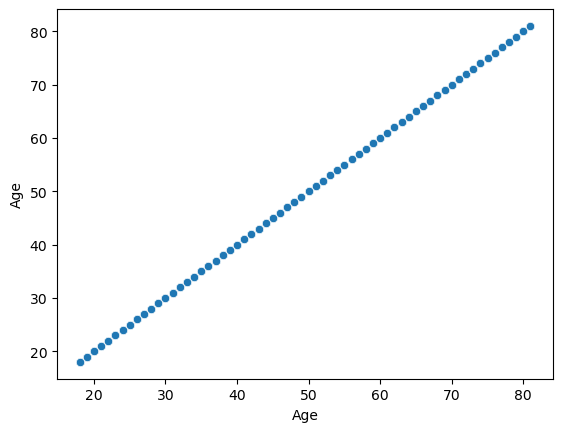

In [29]:
# create scatterplot of "age" column to identify outliers

scat_age = sns.scatterplot(x = 'Age', y = 'Age', data = df)

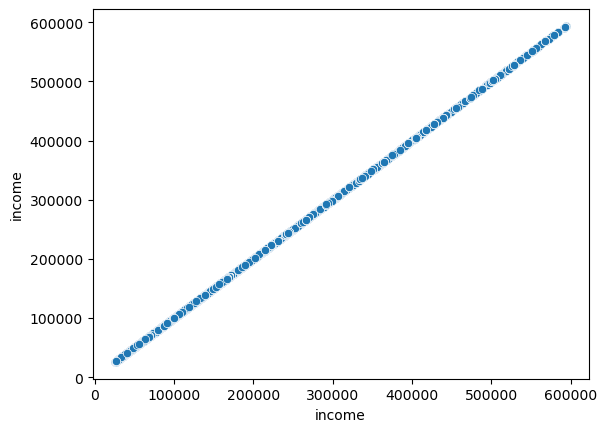

In [30]:
# create scatterplot of "income" column to identify outliers

scat_income = sns.scatterplot(x = 'income', y = 'income', data = df)

In [31]:
df.loc[df['income'] > 400000]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,order_freq,order_frequency_flag,Surname,Gender,STATE,Age,date_joined,number_of_dependents,marital_status,income
2440,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,10.5,807194,146079,14,4,19,...,7.0,Frequent customer,Webster,Male,Indiana,71,2018-09-22,2,married,543925
2584,7,Pure Coconut Water With Orange,98,7,4.4,1540208,52480,2,3,12,...,22.0,Non-frequent customer,Felix,Male,Alabama,56,2018-04-07,1,married,437569
6018,18,Pizza for One Suprema Frozen Pizza,79,1,10.6,444832,135945,7,3,13,...,8.0,Frequent customer,Rosario,Female,Ohio,55,2017-10-23,0,single,544248
7203,25,Salted Caramel Lean Protein & Fiber Bar,3,19,1.9,3333536,658,24,5,18,...,11.0,Regular customer,English,Male,Vermont,75,2017-03-11,0,divorced/widowed,576876
7886,25,Salted Caramel Lean Protein & Fiber Bar,3,19,1.9,2068542,66250,43,4,13,...,4.0,Frequent customer,Holland,Male,Alabama,67,2018-10-22,3,married,420369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32400548,49683,Cucumber Kirby,83,4,13.2,14941,197521,5,6,9,...,27.0,Non-frequent customer,Mitchell,Female,West Virginia,81,2018-06-12,1,married,501962
32401159,49683,Cucumber Kirby,83,4,13.2,3162205,198803,1,1,18,...,9.0,Frequent customer,Shannon,Female,California,60,2019-12-26,1,married,427476
32401160,49683,Cucumber Kirby,83,4,13.2,2127374,198803,2,3,13,...,9.0,Frequent customer,Shannon,Female,California,60,2019-12-26,1,married,427476
32401161,49683,Cucumber Kirby,83,4,13.2,1043952,198803,3,2,12,...,9.0,Frequent customer,Shannon,Female,California,60,2019-12-26,1,married,427476


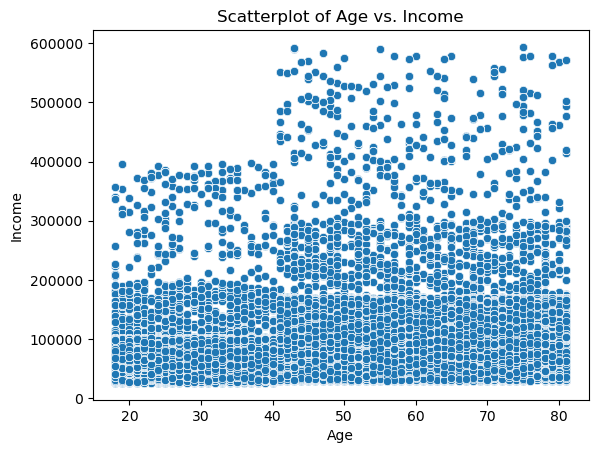

In [32]:
scat_age_income = sns.scatterplot(x = 'Age', y = 'income', data = df)
plt.title('Scatterplot of Age vs. Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

## The scatterplot effectively depicts the correlation between age and income. Notably, the income tends to peak around 200,000 USD within the age range of approximately 20 to 40 years. Beyond this range, specifically between 40 and 80 years, the income reaches a maximum of approximately 300,000 USD. Additionally, the plot indicates the presence of approximately 48,000 potential outliers with incomes exceeding the 400,000 USD threshold.

# 8. Export your visualizations as “.png” files in your relevant project folder.

In [33]:
# export histogram as a PNG file
hist_3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_hour.png'))

In [34]:
# export bar chart as a PNG file
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_flag.png'))

In [35]:
# export line charts as a PNG file
line_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_price_hour.png'))
line_3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_famstat.png'))

In [36]:
# export scatterplot chart as a PNG file
scat_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scat_age_income.png'))